<a href="https://colab.research.google.com/github/cristiandarioortegayubro/BDS/blob/main/modulo.04/bds_algoritmos_005_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center">
<img src="https://github.com/cristiandarioortegayubro/BDS/blob/main/images/Logo%20BDS%20Horizontal%208.png?raw=true">
</p>

<p align="center">
<img src="https://github.com/cristiandarioortegayubro/BDS/blob/main/images/Logo%20Scikit-learn.png?raw=true">
</p>

 # **<font color="DeepPink">Modelos supervisados: Árbol de Decisión para Clasificación con `sklearn`</font>**


<p align="justify">
En este cuaderno, presentamos cómo funcionan los <b>árboles de decisión en problemas de clasificación</b>.
<br>
<br>
Los árboles de decisión en clasificación se utilizan para predecir variables respuesta categóricas. Los métodos de machine learning basados en árboles engloban a un conjunto de técnicas supervisadas no paramétricas que consiguen segmentar el espacio muestral en regiones más pequeñas.
<br>
<br>
La principal implementación de árboles de decisión en Python está disponible en la librería <code>scikit-learn</code> a través de las clases <code>DecisionTreeClassifier</code> y <code>DecisionTreeRegressor</code>.
<br>
<br>
Como criterio de selección de las divisiones óptimas existen varias alternativas, todas ellas con el objetivo de encontrar nodos lo más puros/homogéneos posible.
<br>
<br>
Las criterios para medir la pureza de los nodos más empleadas son:

- **Índice Gini**: cuantifica la varianza total en el conjunto de las  $n$ clases del nodo. Cuando Gini es 0, significa que ese nodo es totalmente puro. Por el contrario, si la frecuencia de cada clase es la misma, el valor del Índice Gini alcanza el valor máximo de 0.5. La impureza se refiere a cómo de mezcladas están las clases en cada nodo.
<br>
<br>  

$$G = 1- \sum_{i=1}^n ({p}_{i})^2$$
<br>

<p align="justify">
Donde $p_i$ representa la proporción de observaciones del nodo que pertenecen a
la clase  $i$.

- **Entropía**: es una forma de cuantificar el desorden de un sistema. En el caso de los nodos, el desorden se corresponde con la impureza. Si un nodo es puro, contiene únicamente observaciones de una clase, su entropía es 0. Por el contrario, si la frecuencia de cada clase es la misma, el valor de la entropía alcanza el valor máximo de 1.
<br>
<br>

$$ H = \sum_{i=1}^n -{p}_{i} \ log({p}_{i}) $$
<br>

Análicemos el siguiente ejemplo:

<p align="center">
<img src="https://github.com/cristiandarioortegayubro/BDS/blob/main/images/Arbol-001.png?raw=true" width="280">
</p>

<p align="justify">
El Gini del nodo superior sería: $1-(1/4)^2-(3/4)^2 = 0.375$. Si el criterio para medir la pureza de la división fuera la Entropía el cálculo sería: $-1/4\log_{2}(1/4)- 3/4  \log _{2}(3/4) = 0,8112$
<br>
<br>
📊 Graficamente la Entropía o pureza del nodo se puede visualizar del siguiente modo:


<p align="center">
<img src="https://github.com/cristiandarioortegayubro/BDS/blob/main/images/Arbol-002.png?raw=true" width="300">
</p>

## **<font color="DeepPink">Bibliotecas**

In [1]:
# Operaciones matemáticas y estadísticas
import pandas as pd
import numpy as np

In [2]:
# Visualización
import plotly.express as px
import plotly.graph_objs as go

## **<font color="DeepPink">Conjunto de Datos**

<p align="justify">
El conjunto de datos <code>Carseats</code>, original del paquete de R <code>ISLR</code> y accesible en Python a través de <code>statsmodels.datasets.get_rdataset</code>, contiene información sobre la venta de sillas infantiles en 400 tiendas distintas.
<br>
<br>
Para cada una de las 400 tiendas se han registrado 11 variables. Se pretende generar un modelo de clasificación que permita predecir si una tienda tiene ventas altas (<code>Sales</code> $>$ 9) o bajas (<code>Sales</code> $<=$ 9) en función de todas las variables disponibles.

In [3]:
import statsmodels.api as sm
carseats = sm.datasets.get_rdataset("Carseats", "ISLR")
datos = carseats.data
print(carseats.__doc__)

.. container::

   ======== ===============
   Carseats R Documentation
   ======== ===============

   .. rubric:: Sales of Child Car Seats
      :name: Carseats

   .. rubric:: Description
      :name: description

   A simulated data set containing sales of child car seats at 400
   different stores.

   .. rubric:: Usage
      :name: usage

   ::

      Carseats

   .. rubric:: Format
      :name: format

   A data frame with 400 observations on the following 11 variables.

   ``Sales``
      Unit sales (in thousands) at each location

   ``CompPrice``
      Price charged by competitor at each location

   ``Income``
      Community income level (in thousands of dollars)

   ``Advertising``
      Local advertising budget for company at each location (in
      thousands of dollars)

   ``Population``
      Population size in region (in thousands)

   ``Price``
      Price company charges for car seats at each site

   ``ShelveLoc``
      A factor with levels ``Bad``, ``Good`` and ``

In [4]:
datos.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


<p align="justify">
Como <code>Sales</code> es una variable continua y el objetivo del estudio es clasificar las tiendas según si venden mucho o poco, se crea una nueva variable dicotómica (<code>'altas'</code>, <code>'bajas'</code>) llamada <code>sales</code>.

In [6]:
datos['sales'] = datos.Sales.apply(lambda x: "altas" if x > 9 else "bajas")
#datos['sales'] = np.where(datos.Sales > 9, "altas", "bajas")

<p align="justify">
Una vez creada la nueva variable respuesta categórica se descarta la original mediante el método <code>drop()</code>.

In [7]:
datos = datos.drop(columns = 'Sales')

In [8]:
datos.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,Bad,42,17,Yes,Yes,altas
1,111,48,16,260,83,Good,65,10,Yes,Yes,altas
2,113,35,10,269,80,Medium,59,12,Yes,Yes,altas
3,117,100,4,466,97,Medium,55,14,Yes,Yes,bajas
4,141,64,3,340,128,Bad,38,13,Yes,No,bajas


## **<font color="DeepPink">Análisis Gráfico**

In [9]:
px.scatter(datos,
           x='Price',
           y='Age',
           color='sales',
           template="gridon")

 ## **<font color="DeepPink">División del conjunto de datos</font>**

In [10]:
X = datos.drop(columns=['sales'])
y = datos['sales']

 ## **<font color="DeepPink">Preprocesamiento de variables categóricas con `sklearn`</font>**

In [11]:
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

<p align="justify">
Primero se identifica el nombre de las columnas categóricas y numéricas. El resultado es una <code>lista</code>.

In [12]:
categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(X)

In [ ]:
#categorical_columns = X.select_dtypes(include=['object', 'category']).columns.tolist()

In [13]:
numerical_columns_selector = selector(dtype_include=[int,float])
numerical_columns = numerical_columns_selector(X)

<p align="justify">
Luego se aplica <b>one-hot-encoding</b> solo a las columnas categóricas. El parámetro <code>remainder</code> en <code>ColumnTransformer</code> determina cómo se deben manejar las columnas que no son seleccionadas o transformadas por los transformadores.
<br>
<br>
De forma predeterminada, el parámetro <code>remainder</code> está configurado en <code>drop</code>, lo que significa que cualquier columna restante que no esté especificada en los transformadores se eliminará.
<br>
<br>
Alternativamente, puedes establecer <code>remainder='passthrough'</code> para incluir las columnas restantes en la salida sin aplicar ninguna transformación. Esto es útil cuando se necesitan mantener ciertas columnas sin cambios, como en este caso las columnas numéricas.

In [14]:
preprocessor = ColumnTransformer(
                    [('one-hot-encoding',
                      OneHotEncoder(handle_unknown='ignore',
                                    sparse_output=False),
                      categorical_columns)],
                    remainder='passthrough')

<p align="justify">
Una vez que se ha definido el objeto <code>ColumnTransformer</code>, con el método <code>fit_transform()</code> se aplican las tranformaciones al conjunto de datos <code>X</code>.

In [15]:
X_encoded = preprocessor.fit_transform(X)
X_encoded

array([[  1.,   0.,   0., ..., 120.,  42.,  17.],
       [  0.,   1.,   0., ...,  83.,  65.,  10.],
       [  0.,   0.,   1., ...,  80.,  59.,  12.],
       ...,
       [  0.,   0.,   1., ..., 159.,  40.,  18.],
       [  1.,   0.,   0., ...,  95.,  50.,  12.],
       [  0.,   1.,   0., ..., 120.,  49.,  16.]])

<p align="justify">
El resultado devuelto es un <code>numpy array</code>, por lo que se pierden los nombres de las columnas. Suele ser interesante poder inspeccionar cómo queda el conjunto de datos tras el preprocesado en formato <code>DataFrame</code>.
<br>
<br>
Por defecto, <code>OneHotEncoder</code> ordena las nuevas columnas de izquierda a derecha por orden alfabético.

Convertir el `numpy array` en `dataframe` y añadir el nombre de las columnas.

In [16]:
columns_endoded = preprocessor.named_transformers_['one-hot-encoding'].get_feature_names_out(categorical_columns)
columns_endoded

array(['ShelveLoc_Bad', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Urban_No',
       'Urban_Yes', 'US_No', 'US_Yes'], dtype=object)

In [17]:
labels = np.concatenate([columns_endoded,numerical_columns])
X_transformed = pd.DataFrame(X_encoded, columns=labels)
X_transformed.head()

,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,CompPrice,Income,Advertising,Population,Price,Age,Education
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,138.0,73.0,11.0,276.0,120.0,42.0,17.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,111.0,48.0,16.0,260.0,83.0,65.0,10.0
2,0.0,0.0,1.0,0.0,1.0,0.0,1.0,113.0,35.0,10.0,269.0,80.0,59.0,12.0
3,0.0,0.0,1.0,0.0,1.0,0.0,1.0,117.0,100.0,4.0,466.0,97.0,55.0,14.0
4,1.0,0.0,0.0,0.0,1.0,1.0,0.0,141.0,64.0,3.0,340.0,128.0,38.0,13.0


In [18]:
X_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ShelveLoc_Bad     400 non-null    float64
 1   ShelveLoc_Good    400 non-null    float64
 2   ShelveLoc_Medium  400 non-null    float64
 3   Urban_No          400 non-null    float64
 4   Urban_Yes         400 non-null    float64
 5   US_No             400 non-null    float64
 6   US_Yes            400 non-null    float64
 7   CompPrice         400 non-null    float64
 8   Income            400 non-null    float64
 9   Advertising       400 non-null    float64
 10  Population        400 non-null    float64
 11  Price             400 non-null    float64
 12  Age               400 non-null    float64
 13  Education         400 non-null    float64
dtypes: float64(14)
memory usage: 43.9 KB


 ## **<font color="DeepPink">División del conjunto de entrenamiento y prueba</font>**

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_transformed,
                                                    y,
                                                    random_state=123)

 ## **<font color="DeepPink">Ajuste y evaluación del modelo con `sklearn`</font>**

Documentación [Árbol de Decisión para Clasificación](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [20]:
from sklearn.tree import DecisionTreeClassifier

<p align="justify">
En este ejemplo, se crea un de árbol de decisión para clasificación mediante la clase <code>DecisionTreeClassifier()</code> de <code>scikit_learn</code>. Luego, se ajusta el modelo a los datos de entrenamiento utilizando el método <code>fit()</code>, donde <code>X_train</code> representa las variabres predictoras de entrenamiento e </code>y_train</code> es la variable objetivo de entrenamiento.
<br>
<br>
Los hiperparámetros utilizados son:

- `max_depth = 2`: establece la profundidad máxima del árbol de decisión. Limita el número de niveles y nodos en el árbol. En este caso, el árbol tendrá una profundidad máxima de 2. Se estableció en este valor solo a fines pedagógicos para mostrar el funcionamiento del árbol.

- `criterion = 'entropy'`: especifica el criterio utilizado para medir la calidad de una división durante la construcción del árbol de decisión. El criterio de `'entropy'` utiliza el concepto de entropía de la información para medir la impureza de los nodos. Por defecto, el valor de este hiper-parámetro es `'gini'`.

- `random_state = 123`: establece la semilla aleatoria para garantizar la reproducibilidad. Al establecer el estado aleatorio en un valor específico (123 en este caso), el generador de números aleatorios producirá la misma secuencia de números aleatorios cada vez que ejecutes el código. Esto asegura que tus resultados sean consistentes y reproducibles.

In [21]:
model_dt = DecisionTreeClassifier(max_depth = 2,
                                  criterion = 'entropy',
                                  random_state = 123
                                  )

In [22]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=123)

<p align="justify">
Una vez ajustado el modelo, se pueden realizar predicciones en los datos de prueba utilizando el método <code>predict()</code> y evaluarlo con <code>score()</code>.

In [23]:
model_dt.predict(X_test)

array(['altas', 'altas', 'bajas', 'altas', 'bajas', 'bajas', 'bajas',
       'altas', 'bajas', 'bajas', 'bajas', 'bajas', 'bajas', 'altas',
       'bajas', 'bajas', 'bajas', 'bajas', 'bajas', 'bajas', 'bajas',
       'bajas', 'bajas', 'altas', 'bajas', 'bajas', 'altas', 'bajas',
       'bajas', 'bajas', 'altas', 'bajas', 'bajas', 'altas', 'bajas',
       'bajas', 'bajas', 'bajas', 'bajas', 'altas', 'bajas', 'bajas',
       'bajas', 'bajas', 'bajas', 'altas', 'altas', 'bajas', 'bajas',
       'bajas', 'altas', 'bajas', 'bajas', 'altas', 'bajas', 'bajas',
       'altas', 'bajas', 'bajas', 'altas', 'bajas', 'bajas', 'bajas',
       'bajas', 'altas', 'bajas', 'bajas', 'bajas', 'bajas', 'altas',
       'bajas', 'altas', 'bajas', 'bajas', 'altas', 'bajas', 'bajas',
       'bajas', 'bajas', 'bajas', 'bajas', 'bajas', 'bajas', 'bajas',
       'altas', 'bajas', 'bajas', 'altas', 'bajas', 'bajas', 'bajas',
       'bajas', 'altas', 'bajas', 'bajas', 'bajas', 'bajas', 'bajas',
       'altas', 'baj

In [24]:
y_test.values

array(['altas', 'altas', 'altas', 'bajas', 'bajas', 'altas', 'bajas',
       'bajas', 'bajas', 'bajas', 'bajas', 'bajas', 'bajas', 'bajas',
       'altas', 'bajas', 'bajas', 'bajas', 'bajas', 'bajas', 'bajas',
       'bajas', 'altas', 'altas', 'bajas', 'bajas', 'altas', 'bajas',
       'altas', 'bajas', 'altas', 'bajas', 'bajas', 'bajas', 'altas',
       'bajas', 'bajas', 'bajas', 'bajas', 'bajas', 'altas', 'bajas',
       'bajas', 'altas', 'bajas', 'bajas', 'altas', 'altas', 'bajas',
       'bajas', 'bajas', 'bajas', 'bajas', 'altas', 'bajas', 'altas',
       'altas', 'bajas', 'bajas', 'altas', 'bajas', 'bajas', 'bajas',
       'bajas', 'altas', 'bajas', 'altas', 'altas', 'bajas', 'altas',
       'bajas', 'bajas', 'bajas', 'bajas', 'altas', 'bajas', 'bajas',
       'altas', 'altas', 'bajas', 'altas', 'bajas', 'bajas', 'bajas',
       'altas', 'altas', 'altas', 'altas', 'bajas', 'bajas', 'altas',
       'bajas', 'altas', 'altas', 'altas', 'bajas', 'bajas', 'bajas',
       'altas', 'baj

In [25]:
model_dt.score(X_test, y_test)

0.72

<p align="justify">
La <b>exactitud</b> o <b>accuracy</b> del modelo es 0.72. Es decir, el modelo es capaz de predecir correctamente un 72 % de las observaciones del conjunto de prueba.

In [26]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(model_dt, X_transformed, y, cv = 5)
cv_results

{'fit_time': array([0.00516653, 0.00315118, 0.00297308, 0.00433517, 0.00312471]),
 'score_time': array([0.0034163 , 0.00188971, 0.00183082, 0.0026741 , 0.00188136]),
 'test_score': array([0.7875, 0.825 , 0.775 , 0.775 , 0.775 ])}

In [27]:
scores = cv_results["test_score"]
print("")
print(f"La accuracy mediante cross-validation es: {scores.mean():.3f} ± {scores.std():.3f}")


La accuracy mediante cross-validation es: 0.787 ± 0.019


 ## **<font color="DeepPink">Visualización del árbol de decisión</font>**

Documentación [Plot Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html)

Profundidad del árbol: 2
Número de nodos terminales: 4


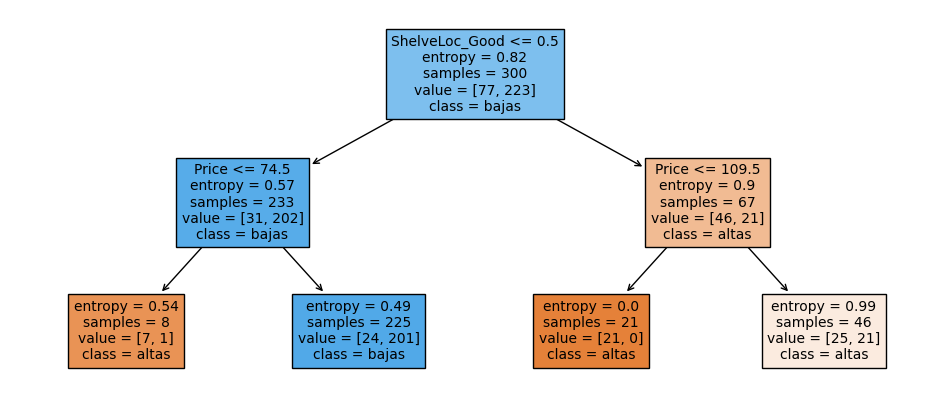

In [28]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 5))
print(f"Profundidad del árbol: {model_dt.get_depth()}")
print(f"Número de nodos terminales: {model_dt.get_n_leaves()}")

plot = plot_tree(
            decision_tree = model_dt,
            feature_names = labels.tolist(),
            class_names   = ['altas','bajas'],
            filled        = True,
            impurity      = True,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

<p align="justify">
El árbol de decisión generado se divide en función de las variables <code>ShelveLoc_Good</code> y <code>Price</code>. La raíz del árbol es la primera división que se realiza. A partir de ahí, cada nodo interno representa una pregunta o condición sobre las características y las ramas salientes representan las diferentes respuestas a esa pregunta.
<br>
<br>
El árbol de decisión se puede interpretar de la siguiente manera:

- En la raíz del árbol, se realiza la primera pregunta: "¿Es `ShelveLoc_Good` menor o igual a 0.5?"
 - Si es verdadero, se sigue por la rama izquierda, y el árbol realiza una segunda pregunta: "¿Es `Price` menor o igual a 74.5?"
    - Si es verdadero, se llega a una hoja del árbol donde se predice que las ventas son `altas`.
    - Si es falso, se llega a otra hoja del árbol donde se predice que las ventas son `bajas`.
 - Si es falso, se sigue por la rama derecha, y el árbol realizan una segunda pregunta: "¿Es `Price` menor o igual a 109.5?"
    - Si es verdadero, se llega a una hoja del árbol donde se predice que las ventas son `altas`.
    - Si es falso, se llega a otra hoja del árbol donde se predice que las ventas son `altas`.

<br>
<p align="justify">
Las hojas del árbol (nodos terminales) representan las predicciones finales para cada rama. En este caso, las hojas están etiquetadas como <code>altas</code> o <code>bajas</code>, según la clasificación prevista para cada combinación de variables.
<br>
<br>
Teniendo en cuenta el siguiente ejemplo se realiza la clasifición de ventas, suponga la sucursal en la posición 0 del conjunto de prueba que tiene las siguientes características:

In [29]:
X_test.iloc[0,:]

ShelveLoc_Bad         0.0
ShelveLoc_Good        1.0
ShelveLoc_Medium      0.0
Urban_No              1.0
Urban_Yes             0.0
US_No                 0.0
US_Yes                1.0
CompPrice           115.0
Income               62.0
Advertising          11.0
Population          289.0
Price               129.0
Age                  56.0
Education            16.0
Name: 234, dtype: float64

<p align="justify">
Para esta sucursal <code>ShelveLoc_Good</code> es 1 (esto significa que el producto tiene una buena ubicación en la tienda), por lo tanto, mayor a 0.5, por lo tanto se sigue a la rama derecha y acá el precio es 129, el cual es mayor al umbral de 109.5, se sigue por la rama derecha y por lo tanto se predice que la venta en esa sucursal son <code>altas</code>.

In [30]:
model_dt.predict(X_test)[0]

'altas'

In [31]:
y_test[0]

'altas'

<p align="justify">
Los hiperparámetros <code>min_sample_leaf</code> y <code>min_samples_split</code> del algoritmo <code>DecisionTreeClassifier</code> permiten controlar la complejidad del árbol de decisión y evitar divisiones que puedan conducir a nodos con muy pocas muestras, lo que podría resultar en un <b>sobreajuste</b>.
<br>
<br>
Al aumentar los valores de estos hiperparámetros, se obtendrá un árbol de decisión más generalizado y menos complejo.


- `min_samples_leaf` especifica el número mínimo de muestras requeridas para que un nodo sea considerado una hoja (nodo terminal) en el árbol de decisión. Si el número de muestras en un nodo es menor que `min_samples_leaf`, no se realizará una división en ese nodo y se convertirá en una hoja. Este parámetro ayuda a evitar divisiones que produzcan hojas con muy pocas muestras, lo que puede ser útil para evitar sobreajuste. Garantiza un número mínimo de muestras en una hoja terminal.

- `min_samples_split` especifica el número mínimo de muestras requeridas para que se realice una división en un nodo. Si el número de muestras en un nodo es menor que `min_samples_split`, no se realizará ninguna división en ese nodo, y se convertirá en una hoja. Este parámetro controla la cantidad mínima de muestras necesarias para que un nodo sea elegible para realizar una división.

<br>
<p align="justify">
Comprobemos el efecto de incorporar el parámetro <code>min_samples_leaf</code>:

In [32]:
model_dt_2 = DecisionTreeClassifier(min_samples_leaf = 10,
                                    random_state = 123
                                    ).fit(X_train, y_train)

In [33]:
cv_results = cross_validate(model_dt_2, X_transformed, y)
cv_results

{'fit_time': array([0.00875115, 0.00494909, 0.0033474 , 0.00339842, 0.00328517]),
 'score_time': array([0.00350809, 0.00213909, 0.0018816 , 0.0018456 , 0.00179696]),
 'test_score': array([0.8125, 0.8   , 0.7875, 0.825 , 0.825 ])}

In [34]:
scores = cv_results["test_score"]
print("")
print(f"La accuracy mediante cross-validation es: {scores.mean():.3f} ± {scores.std():.3f}")


La accuracy mediante cross-validation es: 0.810 ± 0.015


Profundidad del árbol: 6
Número de nodos terminales: 15


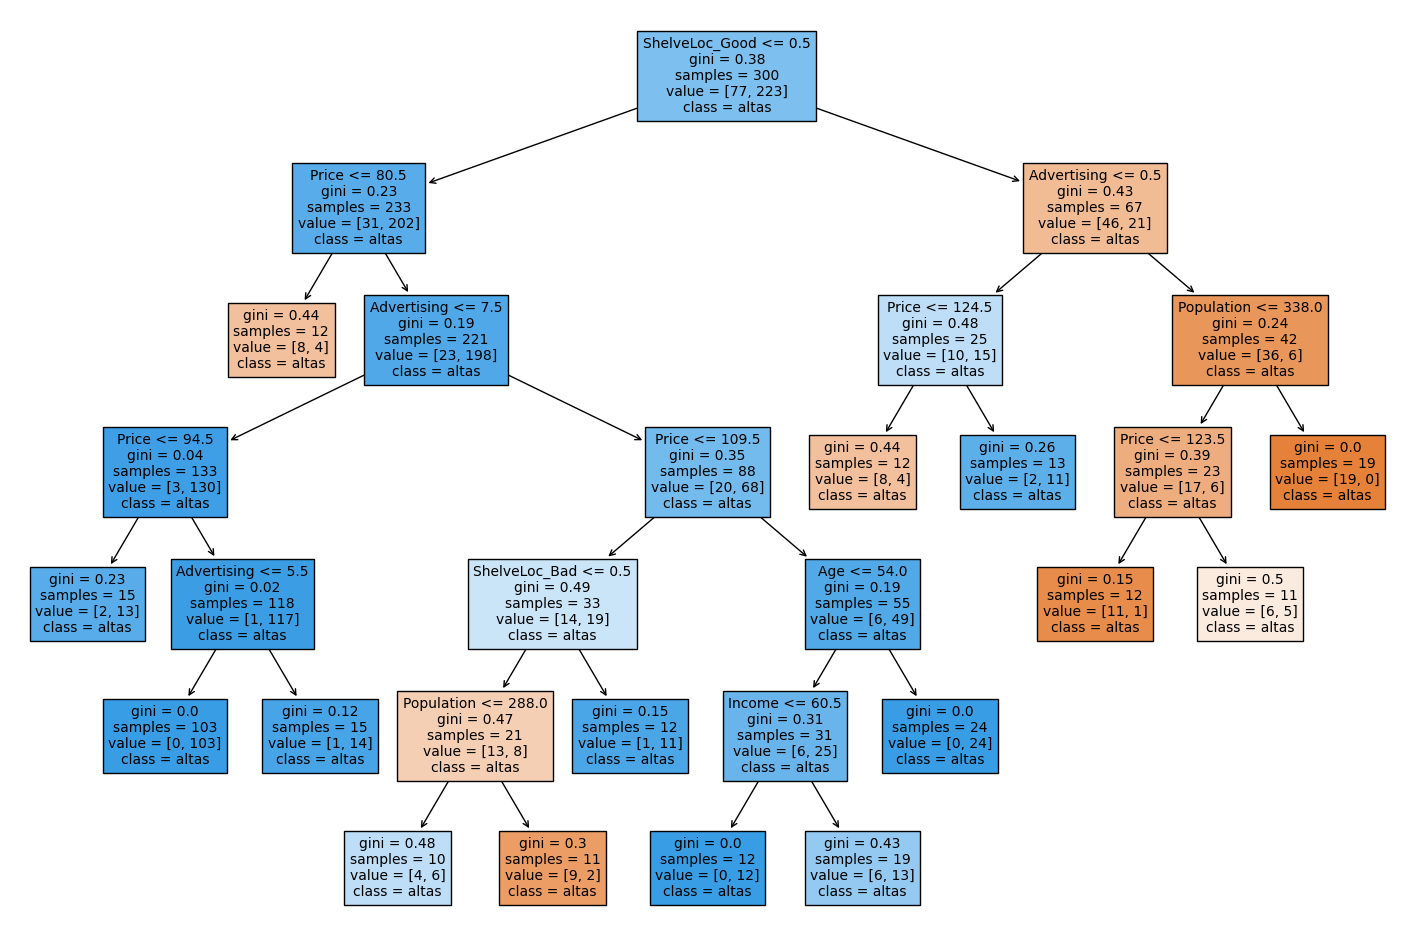

In [35]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(18, 12))
print(f"Profundidad del árbol: {model_dt_2.get_depth()}")
print(f"Número de nodos terminales: {model_dt_2.get_n_leaves()}")

plot = plot_tree(
            decision_tree = model_dt_2,
            feature_names = labels.tolist(),
            class_names   = y,
            filled        = True,
            impurity      = True,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

 # **<font color="DeepPink">Conclusiones</font>**

<p align="justify">
👀 En este colab nosotros:
<br><br>
✅ Utilizamos la biblioteca <code>scikit_learn</code> para entrenar un modelo de árbol de decisión en el contexto de un problema de clasificación.
<br>
✅ Realizamos un análisis del comportamiento del árbol de decisión a través de la generación de un gráfico denominado <code>plot_tee</code>.


<br>
<br>
<p align="center"><b>
💗
<font color="DeepPink">
Hemos llegado al final de nuestro colab, a seguir codeando...
</font>
</p>
<br>
<p align="center">
<img src="https://github.com/cristiandarioortegayubro/BDS/blob/main/images/Logo%20BDS%20Horizontal%208.png?raw=true">
</p>

---
